# Aux 3
## AS4501-1 Astroinformatics

Profs: Valentino Gonzalez, Francisco Forster.

T.A: Melissa Fuentealba.

# Contents

- Supervised Machine Learning
- Classifiers
- Metrics
- Confusion Matrix

# Example 1: Two classes, one feature

In [40]:
# Basics
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm

In [41]:
# To create synthetic data
from sklearn.datasets import make_classification
X, y = make_classification(n_samples = 200, n_classes = 2, n_features=1, n_redundant=0, n_informative=1,
                           random_state=21, n_clusters_per_class=1)

1) n_sample: The number of samples.

2) n_classes: The number of classes (or labels) of the classification problem.

3)  n_features: The total number of features.

4) n_redundant: The number of redundant features. These features are generated as random linear combinations of the informative features.
        
5) n_informative: The number of informative features. Each class is composed of a number of gaussian clusters each located around the vertices of a hypercube in a subspace of dimension n_informative. For each cluster, informative features are drawn independently from N(0, 1) and then randomly linearly combined within each cluster in order to add covariance. The clusters are then placed on the vertices of the hypercube.
  
6) random_state.
  
7) n_clusters_per_classint.

## Split the data

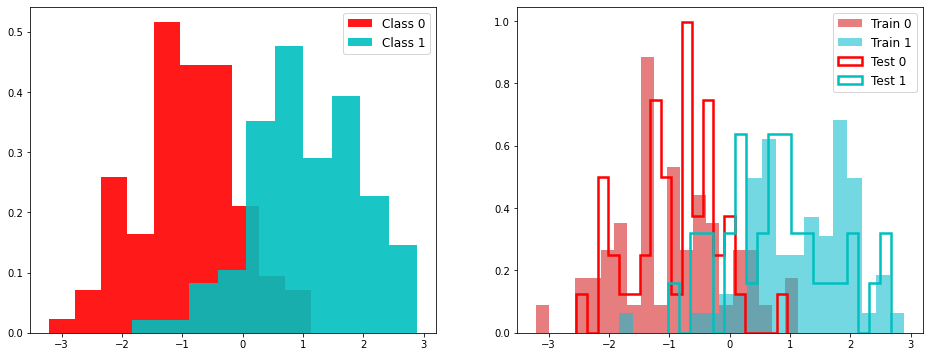

In [45]:
# histogram
fig, ax = plt.subplots(ncols = 2, figsize = (16, 6))

ax[0].hist(X[y==0], density = True, color = 'r', alpha = 0.9, label = 'Class 0')
ax[0].hist(X[y==1], density = True, color = 'c', alpha = 0.9, label = 'Class 1');
ax[0].legend(loc=0, prop={'size':12});

# Split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=19)

ax[1].hist(X_train[y_train==0], density=True, alpha=0.6, bins=20, label='Train 0', color='tab:red')
ax[1].hist(X_train[y_train==1], density=True, alpha=0.6, bins=20, label='Train 1', color='tab:cyan')
ax[1].hist(X_test[y_test==0], density=True, bins=20, label='Test 0', histtype='step', color='r', lw=2.5)
ax[1].hist(X_test[y_test==1], density=True, bins=20, label='Test 1', histtype='step', color='c', lw=2.5)
ax[1].legend(loc=0, prop={'size':12});

## SVC (C-Support Vector Classification)

In [46]:
from sklearn.svm import SVC

# Train a c-support vector classifier (SVC) and plot the probability
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train, y_train)                      
y_test_pred = clf.predict_proba(X_test)[:, 1]

- predict_proba: Returns the probability of the sample for each class in the model.

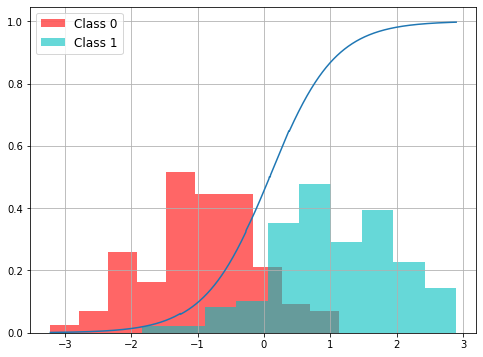

In [47]:
f, ax = plt.subplots(figsize=(8, 6))

ax.hist(X[y==0], density = True, color = 'r', alpha = 0.6, label = 'Class 0')
ax.hist(X[y==1], density = True, color = 'c', alpha = 0.6, label = 'Class 1');
ax.grid()

xx = np.linspace(X.min(), X.max(), 1000)
xx = xx.reshape(-1, 1)
ax.plot(xx, clf.predict_proba(xx)[:, 1], label='')

ax.legend(loc=0, prop={'size':12});

## ROC Curve

In [6]:
from sklearn import metrics

# Receiver Operating Characteristic curve (ROC)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred, pos_label=1)

# Area under the curve (AUC)
auc = metrics.roc_auc_score(y_test, y_test_pred)

# Gini (G1)
gini = 2 * auc - 1

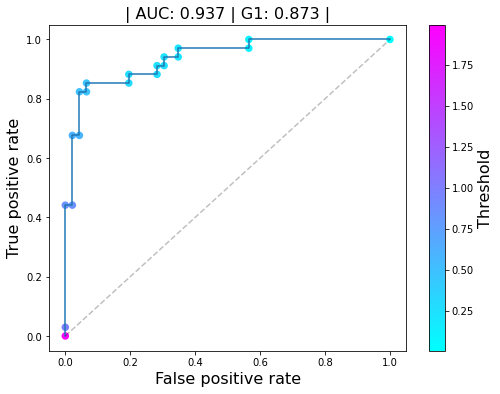

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.set_title(f"| AUC: {auc:.3f} | G1: {gini:.3f} |", fontsize=16)
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], 'k--', alpha = 0.25)
sc = ax.scatter(fpr, tpr, lw=1.5, c=thresh, cmap='cool')

cb = plt.colorbar(sc)
cb.set_label('Threshold', fontsize=16)
ax.set_xlabel("False positive rate", fontsize=16)
ax.set_ylabel("True positive rate", fontsize=16);

## F1 Score

- #### F1 score = 2 (Precision · Recall) / (Precision + Recall)

- Precision = TP / (TP + FP) 

- Recall = TP / (TP + FN)

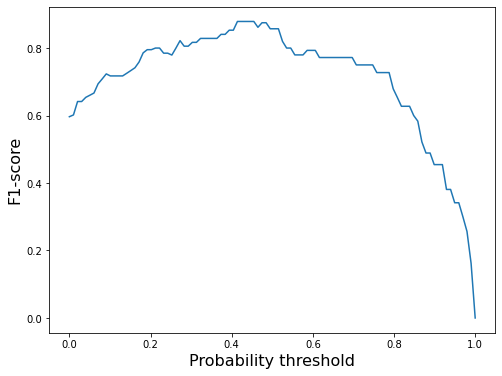

In [48]:
fig, ax = plt.subplots(figsize=(8, 6))

xs = np.linspace(0, 1, 100)
f1scores = list(map(lambda prob: metrics.f1_score(y_test, y_test_pred >= prob), xs))
ax.plot(xs, f1scores)

ax.set_xlabel('Probability threshold', fontsize = 16)
ax.set_ylabel('F1-score', fontsize = 16);

In [49]:
best_prob_thresh = xs[np.where(f1scores == np.max(f1scores))]
print(best_prob_thresh)
print('mean value: ' + str(np.mean(best_prob_thresh)))

[0.41414141 0.42424242 0.43434343 0.44444444 0.45454545]
mean value: 0.4343434343434344


## Confusion Matrix

In [50]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    else:
        pass

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=18)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black", fontsize=18)

    plt.tight_layout()
    plt.ylabel('True label', fontsize=16)
    plt.xlabel('Predicted label', fontsize=16)
    return fig,ax

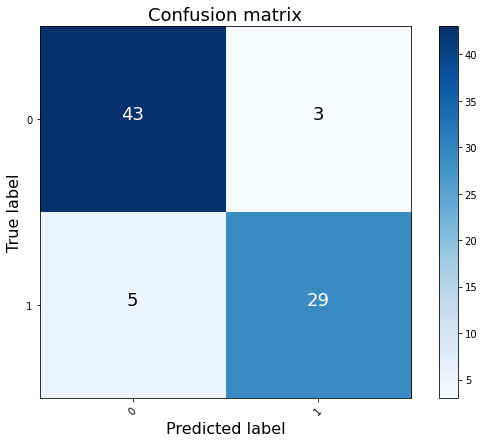

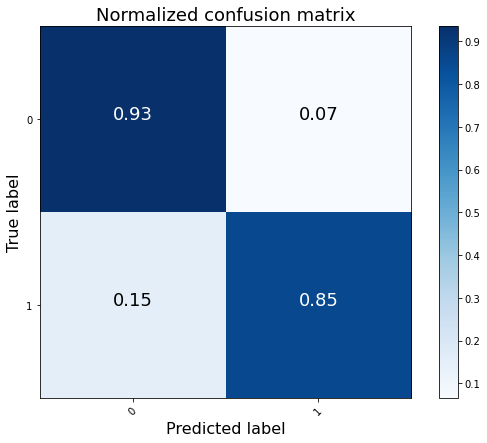

In [54]:
thrsd = 0.45
plt.subplots(figsize=(8, 6))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred >= thrsd), range(2));
plt.subplots(figsize=(8, 6))
plot_confusion_matrix(metrics.confusion_matrix(y_test, y_test_pred >= thrsd), range(2), normalize=True, 
                      title='Normalized confusion matrix');

# Example 2

From SDSS DR8, we select galaxies from two different ranges of redshift (z).

- Class 0: z = [0, 0.002]
- Class 1: z = [0.006, 0.007]

We are going to study 2 properties: Stellar Mass (M$_{\star}$) and specific Star Formation Rate (sSFR). Both quantities are commonly used to construct M$_{\star}$ vs sSFR plot, which allows us to visualize the "Main Sequence" of galaxies but this MS "moves" depending on the redshift of the sources, which means that at different redshifts (z), galaxies describe different behaviors of Star Formation and Stellar Mass content.

In [12]:
df_g = pd.read_csv('Galaxies.csv') 
Galaxies = df_g.drop(['Unnamed: 0'], axis=1)
print("Design matrix shape:", Galaxies.shape)
print("Design matrix columns:", Galaxies.columns)

Design matrix shape: (869, 9)
Design matrix columns: Index(['SPECOBJID', 'SPECSFR_TOT_P50', 'LGM_TOT_P50', 'PETROMAG_U',
       'PETROMAG_G', 'PETROMAG_R', 'PETROMAG_I', 'Z', 'z_id'],
      dtype='object')


In [13]:
Galaxies.head()

,SPECOBJID,SPECSFR_TOT_P50,LGM_TOT_P50,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,Z,z_id
0,3.028723e+17,-10.455682,6.081633,20.23670,18.40825,17.62364,17.09000,0.000443,0
1,3.198889e+17,-10.915128,6.326059,22.30568,20.29656,19.36168,18.76894,0.001219,0
2,3.277037e+17,-10.527724,6.011692,20.99595,19.28009,18.59937,18.15950,0.000563,0
3,3.277034e+17,-10.540108,6.121780,20.99595,19.28009,18.59937,18.15950,0.000520,0
4,3.390416e+17,-9.028938,6.035000,20.99276,19.68084,19.02132,18.47384,0.000187,0


In [14]:
Galaxies.describe()

,SPECOBJID,SPECSFR_TOT_P50,LGM_TOT_P50,PETROMAG_U,PETROMAG_G,PETROMAG_R,PETROMAG_I,Z,z_id
count,8.690000e+02,869.000000,869.000000,869.000000,869.000000,869.000000,869.000000,8.690000e+02,869.000000
mean,1.563096e+18,-9.916970,7.683695,18.348753,16.972522,16.476129,16.433844,5.075940e-03,0.734177
std,7.718034e+17,0.900534,1.077388,2.732754,2.481728,2.377099,2.645403,2.379551e-03,0.442025
min,2.994968e+17,-13.130241,6.006184,12.973840,11.837300,11.006870,10.569560,4.440446e-07,0.000000
25%,8.896163e+17,-10.454477,6.915916,16.771860,15.425460,15.035100,14.836410,1.955420e-03,0.000000
50%,1.491934e+18,-9.785049,7.701470,17.986620,16.827880,16.385990,16.243830,6.295006e-03,1.000000
75%,2.175361e+18,-9.361527,8.384915,19.079230,17.971490,17.535240,17.468960,6.650023e-03,1.000000
max,3.331594e+18,-7.265895,10.916455,34.061620,32.545720,30.171720,32.213580,6.999131e-03,1.000000


In [15]:
zid = Galaxies['z_id'].values

sSFR_tot= Galaxies['SPECSFR_TOT_P50']
SM_tot= (np.array(Galaxies['LGM_TOT_P50']))
SFR_tot = np.array(sSFR_tot * SM_tot)

len(zid[zid==0]), len(zid[zid==1])

(231, 638)

- zid = 0 $\rightarrow$ z is in range of [0, 0.002]

- zid = 1 $\rightarrow$ z is in range of [0.006, 0.007]

### sSFR vs Stellar Mas for different redshifts

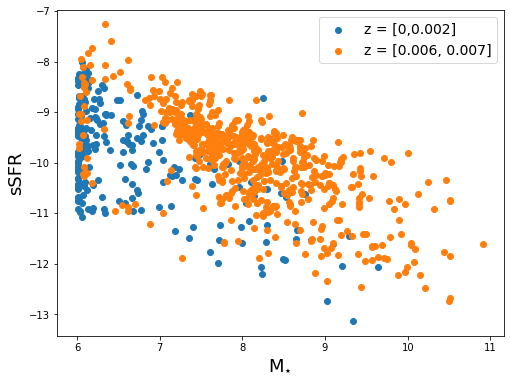

In [16]:
f, ax = plt.subplots(figsize=(8, 6))

ax.scatter(SM_tot[zid==0], sSFR_tot[zid==0], label = 'z = [0,0.002]')
ax.scatter(SM_tot[zid==1], sSFR_tot[zid==1], label = 'z = [0.006, 0.007]')
ax.set_xlabel('M$_{\star}$', fontsize=18)
ax.set_ylabel('sSFR', fontsize=18)
ax.legend(fontsize=14);

## Classifiers

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC 
from sklearn.gaussian_process import GaussianProcessClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neural_network import MLPClassifier 
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.gaussian_process.kernels import RBF

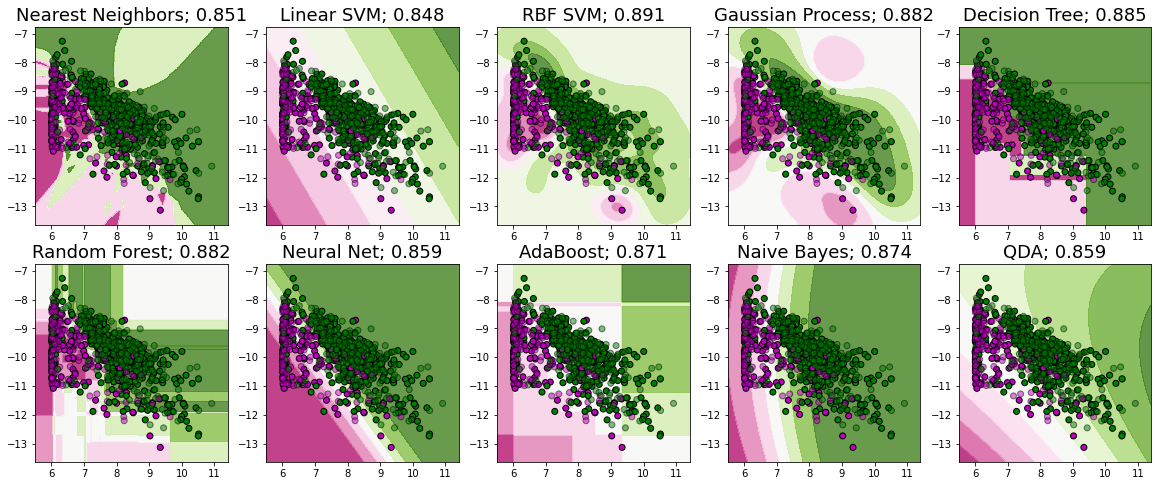

In [18]:
h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"] # names of classifiers

preds = [] # predictions

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X = np.stack((SM_tot, sSFR_tot)).T 
# stack joins a sequence of arrays along a new axis.

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, zid, test_size=0.4)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# meshgrid returns coordinate matrices from coordinate vectors.

figure = plt.figure(figsize=(20, 8))

i = 1
    
for name, clf in zip(names, classifiers):
    ax = plt.subplot(2, len(classifiers)//2, i)
    clf.fit(X_train, y_train)
    sSFR_test_pred = clf.predict_proba(X_test)[:, 1]
    preds.append(sSFR_test_pred)
    # Estimators have a score method providing a default evaluation criterion
    # for the problem they are designed to solve.
    score = clf.score(X_test, y_test)
    
    if hasattr(clf, "decision_function"):
        Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    cmap_c = 'PiYG'
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cmap_c, alpha=.8)
    
    cmap_s = 'PiYG'
    from matplotlib.colors import ListedColormap
    cm_bright = ListedColormap(['m', 'g'])
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, edgecolors='k', alpha=0.5)
    ax.set_title(f'{name}; {score:.3f}', fontsize=18)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    i+=1

- purple dots $\rightarrow$ z is in range of [0, 0.002]

- green dots $\rightarrow$ z is in range of [0.006, 0.007]

## ROC Curve, AUC, Accuracy and F1 score

- Accuracy: # correct labels / total

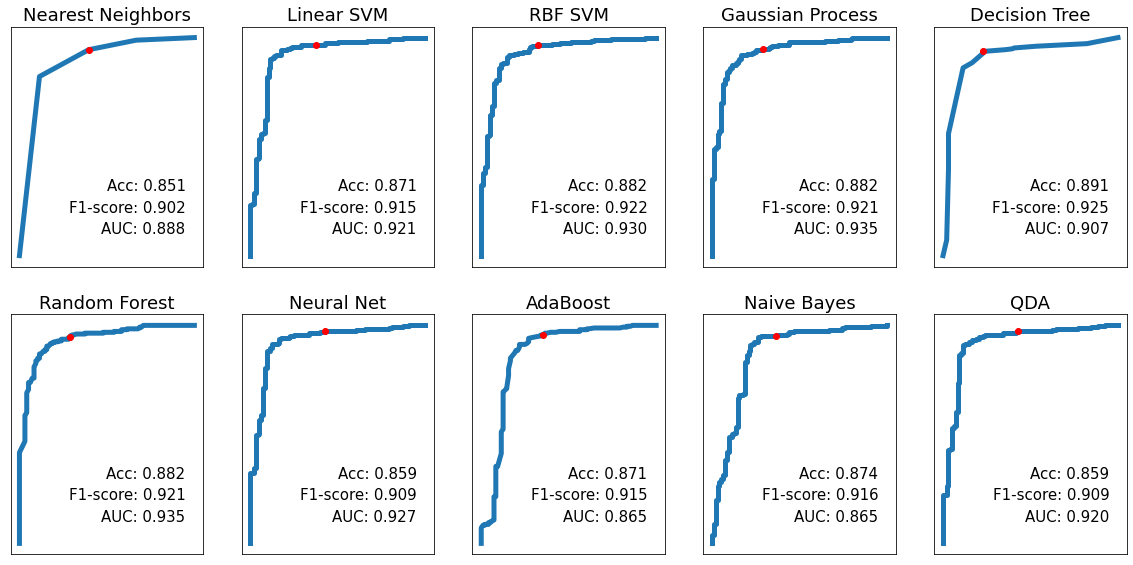

In [19]:
figure = plt.figure(figsize=(20, 15))

for i, name in enumerate(names):
    ax = plt.subplot(3, len(classifiers)//2, i + 1)
    
    
    fpr, tpr, thresholds = metrics.roc_curve(y_test, preds[i], pos_label=1)
    auc = metrics.roc_auc_score(y_test, preds[i])
    acc = metrics.accuracy_score(y_test, preds[i] >= 0.5)
    f1 = metrics.f1_score(y_test, preds[i] >= 0.5)
    
    ax.set_title(f'{name}', fontsize=18)
    
    ax.set_xlim(-.05, 1.05)
    ax.set_ylim(-.05, 1.05)
    ax.set_xticks(())
    ax.set_yticks(())
    ax.text(0.95, 0.3, "Acc: %.3f" % acc, ha = 'right', fontsize=15)
    ax.text(0.95, 0.2, "F1-score: %.3f" % f1, ha = 'right', fontsize=15)
    ax.text(0.95, 0.1, "AUC: %.3f" % auc, ha = 'right', fontsize=15)
    ax.plot(fpr, tpr, lw = 5)
    idx = np.argmin(np.abs(thresholds - 0.5))
    ax.scatter(fpr[idx], tpr[idx], marker='o', c='r', zorder=10)

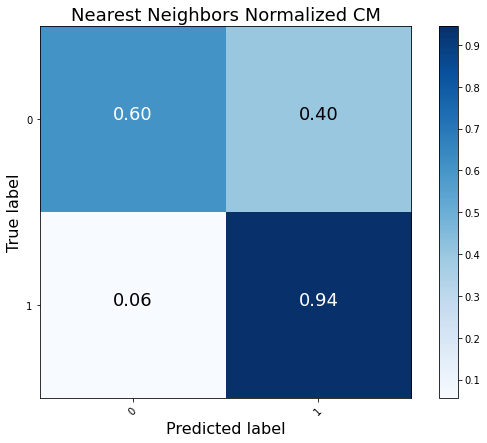

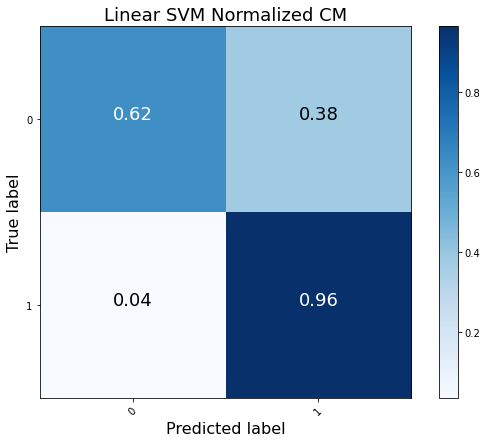

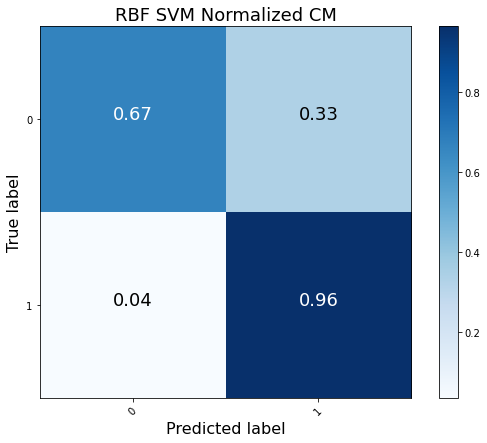

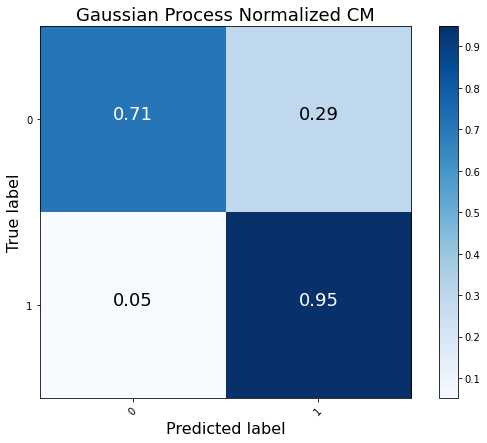

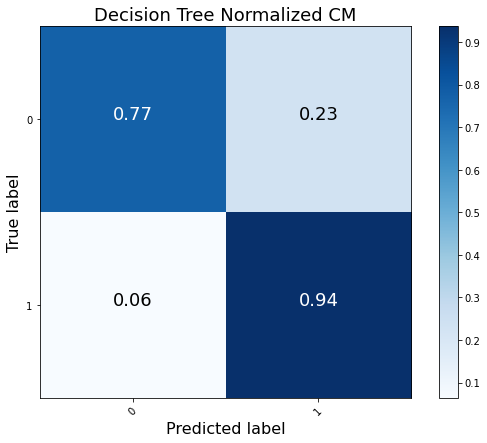

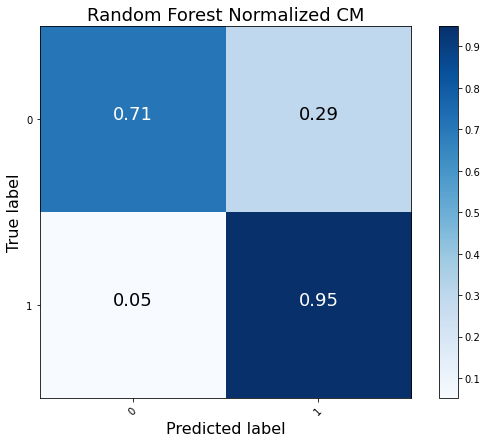

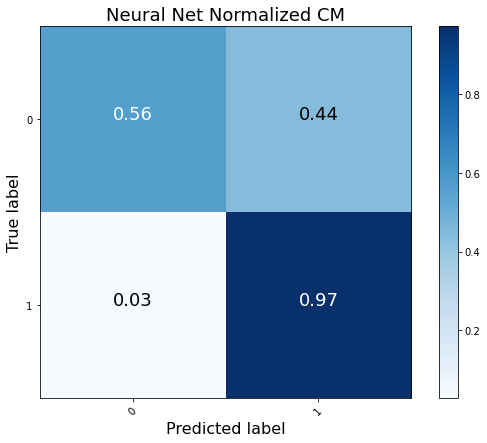

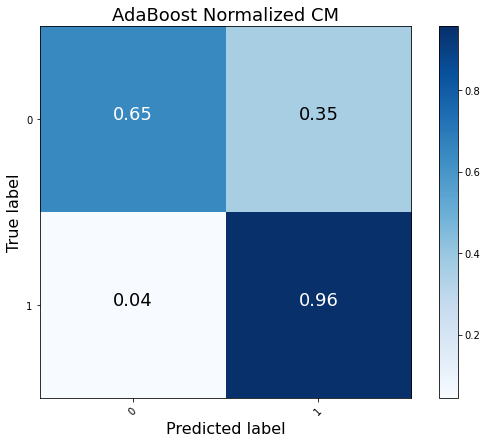

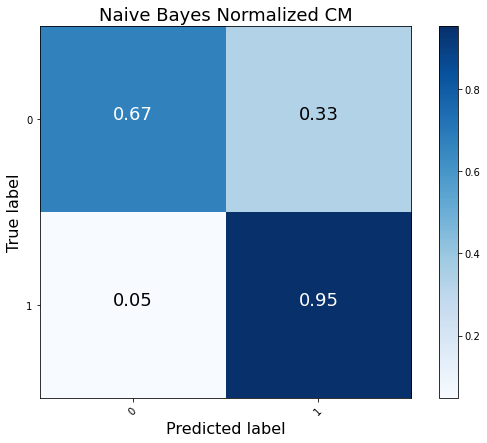

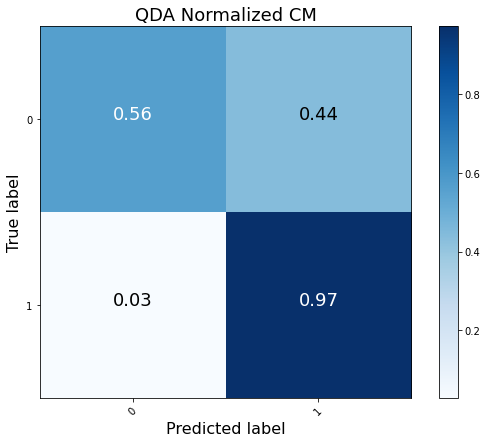

In [20]:
thrsd = 0.5
for i, name in enumerate(names):
    plt.subplots(figsize=(8, 6))
    plot_confusion_matrix(metrics.confusion_matrix(y_test, preds[i] >= thrsd), range(2), 
                          normalize=True, title= name + ' Normalized CM');

# Balancing Data

In [21]:
#Perform over-sampling using ADASYN
from imblearn.over_sampling import ADASYN

X_resampled, y_resampled = ADASYN().fit_resample(X_train, y_train) 
# Fit the statistics and resample the data directly

In [22]:
np.unique(y_resampled, return_counts=True)
data_resampled = pd.DataFrame()
data_resampled["SM"] = X_resampled[:, 0]
data_resampled["sSFR"] = X_resampled[:, 1]
data_resampled["z_id"] = y_resampled
data_resampled["z_id"] = data_resampled["z_id"].astype('category')
data_resampled.head()

,SM,sSFR,z_id
0,6.659099,-10.416768,0
1,6.201647,-8.734028,0
2,7.866369,-9.456916,1
3,6.661388,-10.704972,0
4,9.888999,-10.722391,1


In [23]:
len(data_resampled)

774

In [24]:
len(data_resampled["sSFR"][data_resampled["z_id"]==1]), len(data_resampled["sSFR"][data_resampled["z_id"]==0])

(386, 388)

In [25]:
def plot_contours_lgm(ax, bst, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = bst.predict(np.c_[xx.ravel(), yy.ravel()]) >= 0.5
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [26]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

LabelEncoder can be used to rename the labels of your classes. In our case I am not using it because I am calling my classes 0 and 1 already.

In [27]:
# Light Gradient Boosting Machine
import lightgbm as lgb
from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#le.fit(y_resampled)

# yt_test = le.transform(y_test)
yt_test = (y_test)           
yt_train = (y_train)
yt_resampled = (y_resampled)

In [28]:
# Create lgb dataset objects with and without resampled data
train_data = lgb.Dataset(X_train, label=yt_train)
train_data_resampled = lgb.Dataset(X_resampled, label=yt_resampled)

In [29]:
param = param = {'force_col_wise':True, 'num_leaves':10, 'objective':'binary','max_depth':8,
                 'learning_rate':.05,'max_bin':100, 'unbalance':False, 'verbosity':0}
param['metric'] = 'auc'
num_round = 10

In [30]:
# Perform the training with given parameters.
bst = lgb.train(param, train_data, num_round)

In [31]:
bst_resampled = lgb.train(param, train_data_resampled, num_round)

In [32]:
# Perform the cross-validation with given parameters.
lgb.cv(param, train_data, num_round, nfold=5)

{'auc-mean': [0.9041008374341708,
  0.9051553384886718,
  0.904033004033004,
  0.9017723017723018,
  0.900934250934251,
  0.9018006684673352,
  0.9042309542309541,
  0.9049031215697882,
  0.9059625559625559,
  0.9074018574018574],
 'auc-stdv': [0.026209378807597956,
  0.02624199823696164,
  0.021353934670701683,
  0.02488086904138739,
  0.026004975564434433,
  0.02497872848026712,
  0.024511105624757088,
  0.024491670922738885,
  0.025989455466456327,
  0.026806000527542513]}

In [33]:
lgb.cv(param, train_data_resampled, num_round, nfold=5)

{'auc-mean': [0.8603052791364479,
  0.863480242701022,
  0.8629303596836065,
  0.8653859127885102,
  0.8661766804623948,
  0.8680778096362511,
  0.8690231846076001,
  0.8724556828452933,
  0.8734399799334864,
  0.8735018228524721],
 'auc-stdv': [0.026220581003754326,
  0.023397366451318635,
  0.022725618272899616,
  0.030400780413442356,
  0.028081705286374617,
  0.029757985406750277,
  0.026877480763083925,
  0.028506875323570015,
  0.026883609476404106,
  0.029046807185679955]}

In [34]:
y_pred = np.array(bst.predict(X_test) >= 0.5, dtype=int)
y_pred_resampled = np.array(bst_resampled.predict(X_test) >= 0.5, dtype=int)

## Without resampling

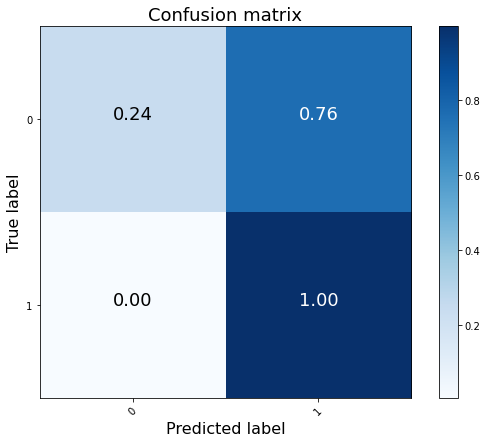

In [35]:
plt.subplots(figsize=(8, 6))
plot_confusion_matrix(metrics.confusion_matrix(np.array(yt_test), y_pred), ["0", "1"], normalize=True);

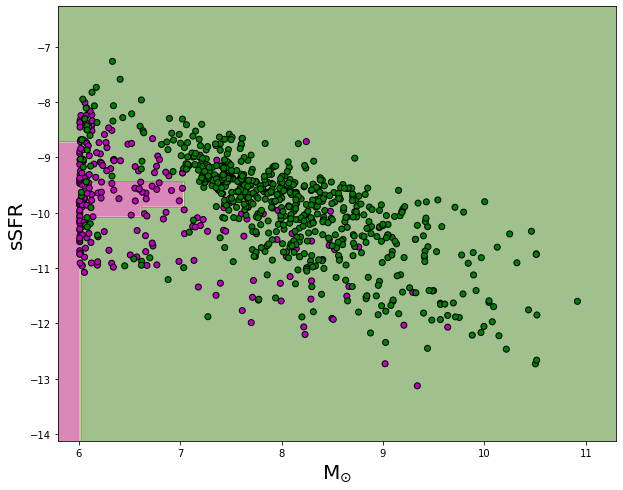

In [36]:
fig, ax = plt.subplots(figsize = (10, 8))

xx, yy = make_meshgrid(SM_tot, sSFR_tot)
plot_contours_lgm(ax, bst, xx, yy, cmap='PiYG', alpha=.5)
cm_bright = ListedColormap(['m', 'g'])
ax.scatter(SM_tot, sSFR_tot, c=Galaxies['z_id'], cmap=cm_bright, edgecolors='k')

ax.set_xlabel("M$_{\odot}$", fontsize=20)
ax.set_ylabel("sSFR", fontsize=20)
ax.set_xlim(5.8, 11.3);

## With resampling

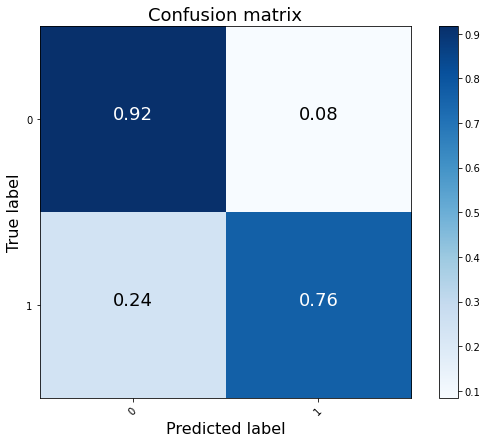

In [37]:
plt.subplots(figsize=(8, 6))
plot_confusion_matrix(metrics.confusion_matrix(np.array(yt_test), y_pred_resampled), ["0", "1"], normalize=True);

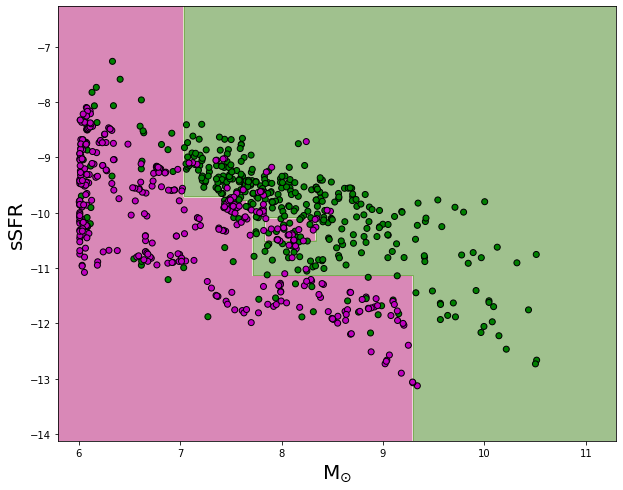

In [38]:
fig, ax = plt.subplots(figsize = (10, 8))

xx, yy = make_meshgrid(data_resampled["SM"].values, data_resampled["sSFR"].values)
plot_contours_lgm(ax, bst_resampled, xx, yy, cmap='PiYG', alpha=.5)
ax.scatter(data_resampled["SM"].values, data_resampled["sSFR"].values, c=(data_resampled.z_id),  cmap=cm_bright, edgecolors='k')

ax.set_xlabel("M$_{\odot}$", fontsize=20)
ax.set_ylabel("sSFR", fontsize=20)
ax.set_xlim(5.8, 11.3);